In [2]:
import os, json
os.makedirs('config/', exist_ok=True)

Next thing is to upload your filepaths.json file into your config folder

In [4]:
# open the json
with open('config/filepaths.json', 'r') as f:
    FPATHS = json.load(f)

FPATHS

{'data': {'raw': {'full': 'Data/loan_approval.csv'},
  'ml': {'train': 'Data/train.joblib', 'test': 'Data/test.joblib'},
  'nlp': {'nlp_full': 'Data/nlp/nlp_full.csv'}},
 'models': {'logistic_regression': 'models/logreg_pipe.joblib',
  'random_forest': 'models/rf_pipe.joblib'},
 'images': {'banner': 'Images/money_tree.jpg'}}

In [5]:
from pprint import pprint
pprint(FPATHS)

{'data': {'ml': {'test': 'Data/test.joblib', 'train': 'Data/train.joblib'},
          'nlp': {'nlp_full': 'Data/nlp/nlp_full.csv'},
          'raw': {'full': 'Data/loan_approval.csv'}},
 'images': {'banner': 'Images/money_tree.jpg'},
 'models': {'logistic_regression': 'models/logreg_pipe.joblib',
            'random_forest': 'models/rf_pipe.joblib'}}


In [6]:
import os
def create_directories_from_paths(nested_dict):
    """OpenAI. (2023). ChatGPT [Large language model]. https://chat.openai.com 
    Recursively create directories for file paths in a nested dictionary.
    Parameters:
    nested_dict (dict): The nested dictionary containing file paths.
    """
    for key, value in nested_dict.items():
        if isinstance(value, dict):
            # If the value is a dictionary, recurse into it
            create_directories_from_paths(value)
        elif isinstance(value, str):
            # If the value is a string, treat it as a file path and get the directory path
            directory_path = os.path.dirname(value)
            # If the directory path is not empty and the directory does not exist, create it
            if directory_path and not os.path.exists(directory_path):
                os.makedirs(directory_path)
                print(f"Directory created: {directory_path}")

# Use the function on your FPATHS dictionary
create_directories_from_paths(FPATHS)

Directory created: Data
Directory created: Data/nlp
Directory created: models
Directory created: Images


In [7]:
FPATHS['data']['raw']['full']

'Data/loan_approval.csv'

In [9]:
import pandas as pd
df = pd.read_csv(FPATHS['data']['raw']['full'])
df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

In [11]:
import joblib
# Load training data with FPATHS dictionary
X_train, y_train = joblib.load(FPATHS['data']['ml']['train'])
X_train

no_of_dependents      education self_employed  income_annum  \
3977                 5       Graduate           Yes       7600000   
2425                 0   Not Graduate            No       6000000   
1545                 2   Not Graduate           Yes       8200000   
173                  2   Not Graduate           Yes       7400000   
3405                 1       Graduate           Yes       3400000   
...                ...            ...           ...           ...   
3444                 0       Graduate           Yes       1300000   
466                  5   Not Graduate           Yes        500000   
3092                 4   Not Graduate           Yes       8600000   
3772                 2   Not Graduate           Yes       7000000   
860                  4       Graduate            No       6200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
3977     18000000         12          452                   7900000   
2425     22900000         16          302                  12200000   
1545     27800000         16          827                  11500000   
173      28200000          8          376                  21900000   
3405      7000000          4          534                   3100000   
...           ...        ...          ...                       ...   
3444      4700000         16          530                   3200000   
466       1800000         18          411                   1000000   
3092     20600000         16          449                  10800000   
3772     21400000         12          541                   3700000   
860      17300000          6          837                  12600000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
3977                  4300000             23800000           4700000  
2425                  6500000             17700000           7100000  
1545                  8700000             26000000          10700000  
173                   5000000             17400000           5200000  
3405                  1600000             13000000           4000000  
...                       ...                  ...               ...  
3444                  1000000              3800000            800000  
466                    500000              1300000            200000  
3092                 10600000             28700000           5400000  
3772                  1300000             19800000           9600000  
860                   3700000             24700000           4600000  

[3201 rows x 11 columns]

In [13]:
# Functionalize loading train or test
def load_Xy_data(fpath):
    return joblib.load(fpath)

In [14]:
X_test, y_test = load_Xy_data(fpath = FPATHS['data']['ml']['test'])
X_test.head()

no_of_dependents      education self_employed  income_annum  \
1703                 5       Graduate            No       5400000   
1173                 2       Graduate            No       5900000   
308                  3       Graduate            No       9600000   
1322                 2       Graduate            No       6200000   
3271                 3   Not Graduate           Yes       5800000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
1703     19700000         20          423                   6500000   
1173     14000000          8          599                   4700000   
308      19900000         14          452                   4200000   
1322     23400000          8          605                  10000000   
3271     14100000         12          738                  11700000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
1703                 10000000             15700000           7300000  
1173                  9500000             17800000           6700000  
308                  16200000             28500000           6600000  
1322                 10800000             21800000           9200000  
3271                  4400000             15400000           8400000

In [15]:
rf_model = joblib.load(FPATHS['models']['random_forest'])
rf_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['education', 'self_employed'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [16]:
# Functionalize loading in a model
def load_model_ml(fpath):
    return joblib.load(fpath)

In [17]:
logreg = load_model_ml(fpath = FPATHS['models']['logistic_regression'])
logreg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['education', 'self_employed'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

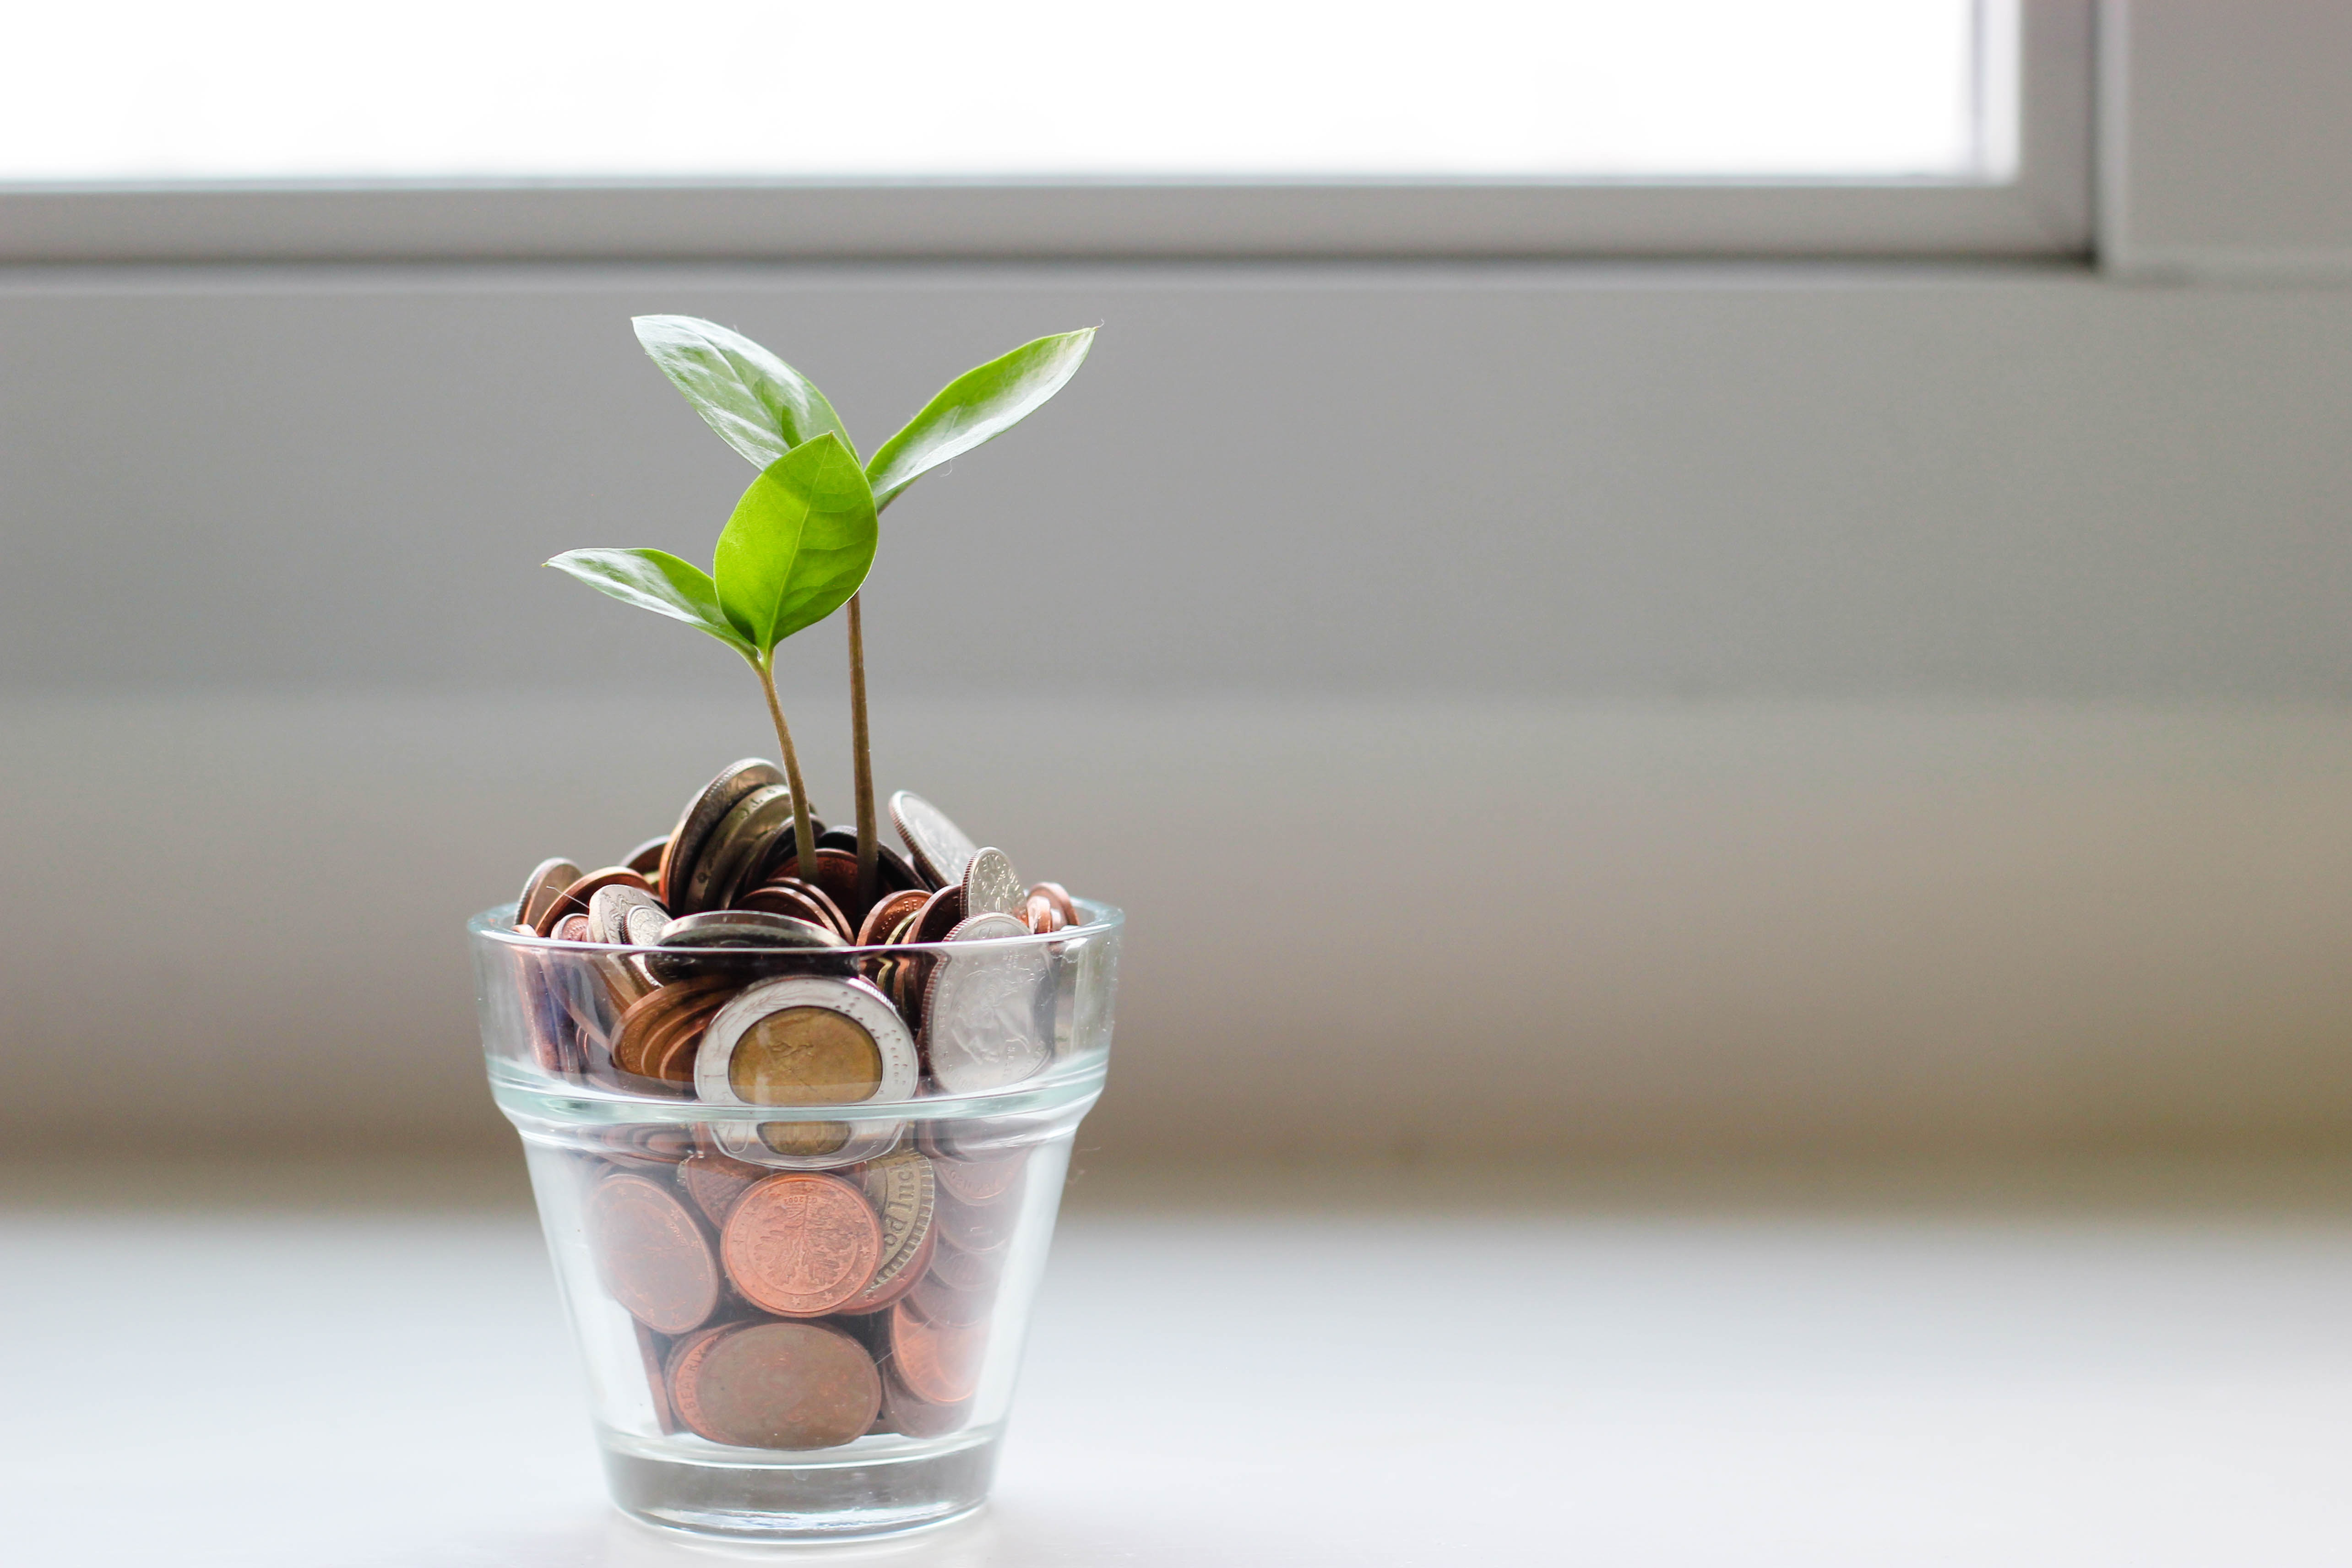

In [18]:
from IPython.display import display
from PIL import Image
image = Image.open(FPATHS['images']['banner'])
display(image)